In [134]:
import mousestyles.data as data
%matplotlib inline

In [135]:
import matplotlib.pyplot as plt

In [136]:
plt.style.use('seaborn-whitegrid')

In [228]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

In [137]:
print(plt.style.available)

['bmh', 'seaborn-dark', 'seaborn-muted', 'seaborn-pastel', 'seaborn-poster', 'dark_background', 'seaborn-dark-palette', 'classic', 'seaborn-deep', 'fivethirtyeight', 'ggplot', 'seaborn-bright', 'seaborn-darkgrid', 'seaborn-ticks', 'seaborn-whitegrid', 'seaborn-colorblind', 'seaborn-paper', 'seaborn-white', 'seaborn-notebook', 'grayscale', 'seaborn-talk']


In [138]:
all_features = data.load_all_features()

In [139]:
all_features

,strain,mouse,day,hour,ASProbability,ASNumbers,ASDurations,Food,Water,Distance,ASFoodIntensity,ASWaterIntensity,MoveASIntensity
0,0,0,5,0,0.260422,1,31.250667,0.252970,0.330341,28.622813,0.134915,0.176178,0.014576
1,0,0,6,0,0.118975,1,16.490667,0.250952,0.269551,10.013321,0.292956,0.314669,0.011087
2,0,0,7,0,0.111603,1,13.392333,0.198600,0.225153,7.052784,0.247156,0.280202,0.007578
3,0,0,8,0,0.146633,1,17.596000,0.293873,0.207443,12.600482,0.278352,0.196487,0.010888
4,0,0,9,0,0.058850,1,7.127000,0.208126,0.197245,3.310738,0.491188,0.465508,0.006085
5,0,0,10,0,0.089600,1,10.752000,0.147975,0.105865,4.978508,0.229375,0.164101,0.006239
6,0,0,11,0,0.060989,1,13.956000,0.326313,0.000000,4.028878,0.743108,0.000000,0.007190
7,0,0,12,0,0.000000,0,0.000000,0.000000,0.000000,0.259767,0.000000,0.000000,0.000000
8,0,0,13,0,0.023039,2,21.027000,0.155196,0.000000,2.192808,0.935592,0.000000,0.004523
9,0,0,14,0,0.147817,1,17.738000,0.183752,0.191435,11.346755,0.172653,0.179873,0.009880


In [ ]:
# 11 bin * 12 days = 132 
# time series length = 132
sum = 0
for i in range(0, 16):
    sum += max(all_features.loc[all_features.loc[:, "strain"]==i, "mouse"]) + 1
    for j in range(int(max(all_features.loc[all_features.loc[:, "strain"]==i, "mouse"]))):
        if len(all_features.loc[(all_features.loc[:, "strain"] == i) & \
                 (all_features.loc[:, "mouse"] == j), :]) != 132:
            print("strain", i, "mouse", j)
            print(len(all_features.loc[(all_features.loc[:, "strain"] == i) & \
                 (all_features.loc[:, "mouse"] == j), :]))

In [204]:
test = all_features.loc[(all_features.loc[:, "strain"] == 0) & \
                 (all_features.loc[:, "mouse"] == 0),:]
test = test.sort_values(by=['day', 'hour'], ascending=[1, 1])
test = test.loc[:,"Food"]
test = test.reset_index().loc[:, "Food"]

In [211]:
# ts = pd.DataFrame(test.values, index=pd.date_range('2014-1-1', periods=132, freq='2h'))
# ts.plot()
# ts.columns = ['Food']

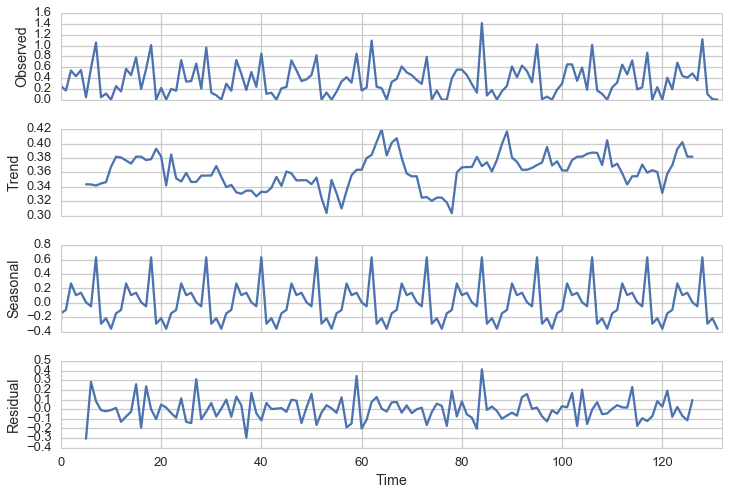

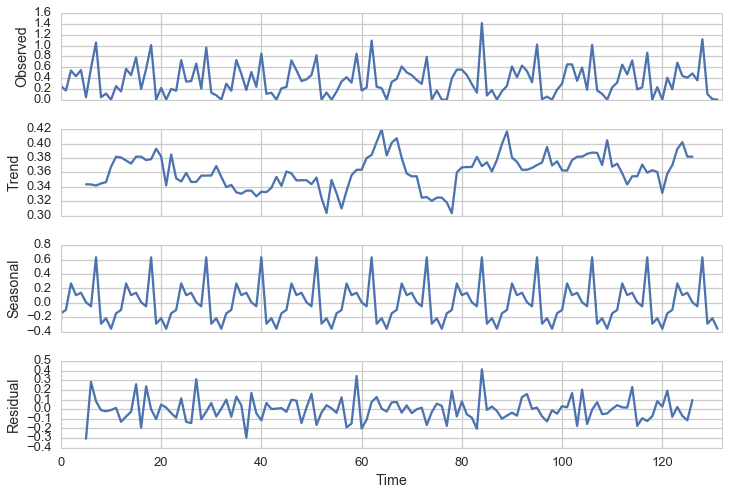

In [257]:
res = sm.tsa.seasonal_decompose(test.values, freq=11, model='additive')
res.plot()

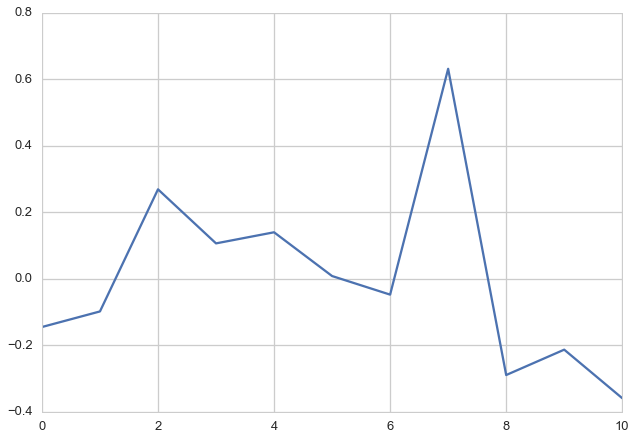

In [243]:
plt.plot(res.seasonal[0:11])

In [250]:
ts = pd.DataFrame(test.values, index=pd.date_range('2014-1-1', periods=132, freq='20min'))

In [251]:
ts

,0
2014-01-01 00:00:00,0.252970
2014-01-01 00:20:00,0.169277
2014-01-01 00:40:00,0.537848
2014-01-01 01:00:00,0.433231
2014-01-01 01:20:00,0.546660
2014-01-01 01:40:00,0.045176
2014-01-01 02:00:00,0.579767
2014-01-01 02:20:00,1.056063
2014-01-01 02:40:00,0.045458
2014-01-01 03:00:00,0.112222


In [102]:
import statsmodels.api as sm

In [176]:
dta = sm.datasets.co2.load_pandas().data
dta

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,NaN
1958-05-17,317.5
1958-05-24,317.9
1958-05-31,NaN


In [184]:
type(dta)

pandas.core.frame.DataFrame

In [178]:
dta.co2.interpolate(inplace=True)

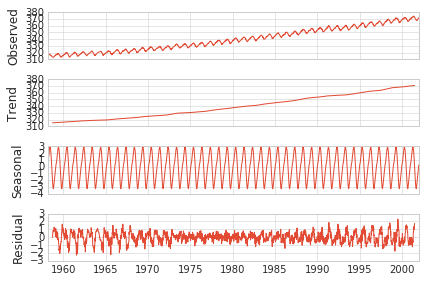

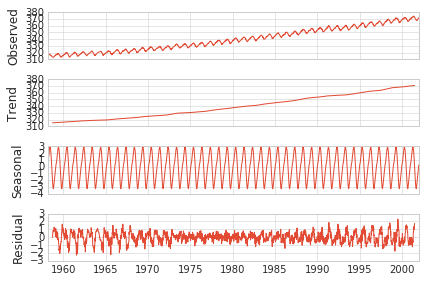

In [183]:
res = sm.tsa.seasonal_decompose(dta)
res.plot()

In [180]:
res = sm.tsa.seasonal_decompose(test, freq=11)
res.plot()

AttributeError: 'Int64Index' object has no attribute 'inferred_freq'

In [170]:
import pandas as pd

In [173]:
pd.reset_option('display.max_rows')

In [151]:
intervals = data.load_intervals('F')
# {"AS", "F", "IS", "M_AS", "M_IS", "W"}

/Users/jorothygong/Desktop/mousestyles/mousestyles/data/__init__.py:120: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  dt = dt.sort(["strain", "mouse", "day"])


In [174]:
intervals

,strain,mouse,day,start,stop
0,0,0,0,50088.046,50088.290
1,0,0,0,50184.611,50186.101
2,0,0,0,50276.032,50276.106
3,0,0,0,50283.830,50284.378
4,0,0,0,50351.783,50353.266
5,0,0,0,50357.098,50358.344
6,0,0,0,50361.079,50361.793
7,0,0,0,50364.147,50364.830
8,0,0,0,50366.938,50367.521
9,0,0,0,50369.039,50369.529


In [15]:
movement = data.load_movement(0, 0, 0)

In [16]:
movement.head()

,t,x,y,isHB
0,49529.76,-10.760,36.113,False
1,49530.89,-10.760,36.113,False
2,49696.73,-11.046,37.078,False
3,49698.51,-11.548,36.189,False
4,49706.59,-10.979,37.033,False
